# <center> Receiver Operating Characteristic (ROC) [[Link]](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html) <center>

Example of ROC metric to evaluate classifier output quality.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [2]:
# Import some data to play with 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [11]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [12]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [13]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(
                svm.SVC(kernel="linear", probability=True, random_state=random_state)
                )
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [14]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#### Plot a ROC curve for a specific class

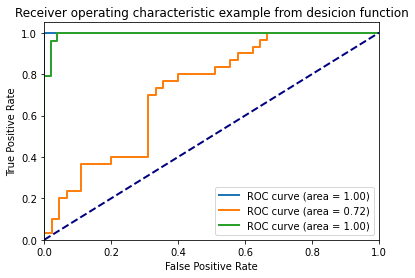

In [15]:
plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        #color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc[i],
    )
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example from desicion function")
plt.legend(loc="lower right")
plt.show()

Since One versus Rest classification is used, the ROC result is poor!

In [ ]:
accrc_list = []
for i in range(1, 6):
    accrc_list.append(np.load('1qpovm_accuracy_seed'+str(i)+'.npy'))

for i in range(1, 6):
    plt.plot(,accrc_list[i], 'x-',label='#'+str(i))

In [ ]:
l